In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from keras import models, layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

Read the Data -> Use a Data Set : German Traffic Sign

In [3]:
image_path = "../Data_Sets/Train"
data_list = []
label_list = []
classes_list = 43

for i in range(classes_list):
    i_path = os.path.join(image_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path + '/' + img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        label_list.append(i)
    data = np.array(data_list)
    labels = np.array(label_list)

Visualize the Data

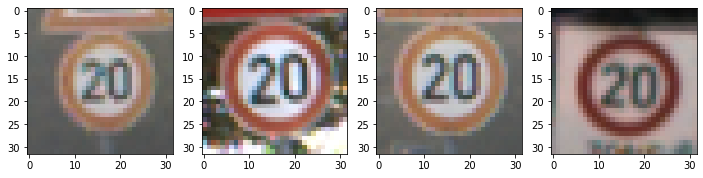

In [4]:
plt.figure(figsize=(12,12))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

Prep the DataSet

In [5]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return(X_prep, y_prep)
X,y = prep_dataset(data, labels)

Splitting the Dataset

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5,shuffle=True)

The CNN

In [1]:
model = models.Sequential() #a sequential model->allows building a model layer by layer

#Conv layer - 64 filters - MaxPooling, BatchNormalization, Dropout
model.add(layers.Conv2D(filters=32, kernel_size=3,activation='relu', padding='same', input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#Conv layer(128 filters) + MaxPooling + BatchNormalization + DropOut
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#Conv layer 512 filters + Dropout + Convlayer -512 filters + Maxpooling + Batch Normalizatio
model.add(layers.Conv2D(filters=512, kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#flatten
model.add(layers.Flatten())

#2 Dense layers with 1000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000, activation='relu'))

#SoftMax layer for the output
model.add(layers.Dense(43,activation='softmax'))

#model.summary()
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf",13)
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False)


NameError: name 'models' is not defined

Fitting the model


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train,Y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, Y_val)
)

Epoch 1/20
491/491 [==============================] - 401s 812ms/step - loss: 1.3176 - accuracy: 0.6462 - val_loss: 0.6029 - val_accuracy: 0.8154
Epoch 2/20
491/491 [==============================] - 379s 771ms/step - loss: 0.2359 - accuracy: 0.9284 - val_loss: 0.1454 - val_accuracy: 0.9505
Epoch 3/20
491/491 [==============================] - 361s 735ms/step - loss: 0.1403 - accuracy: 0.9597 - val_loss: 0.0996 - val_accuracy: 0.9732
Epoch 4/20
491/491 [==============================] - 346s 705ms/step - loss: 0.1100 - accuracy: 0.9696 - val_loss: 0.0836 - val_accuracy: 0.9763
Epoch 5/20
491/491 [==============================] - 366s 746ms/step - loss: 0.1012 - accuracy: 0.9738 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 6/20
491/491 [==============================] - 405s 825ms/step - loss: 0.0879 - accuracy: 0.9793 - val_loss: 0.0378 - val_accuracy: 0.9916
Epoch 7/20
491/491 [==============================] - 399s 813ms/step - loss: 0.0721 - accuracy: 0.9826 - val_loss: 0.0918 -

Visualization of the Accuracy and Loss

Text(0.5, 1.0, 'Loss')

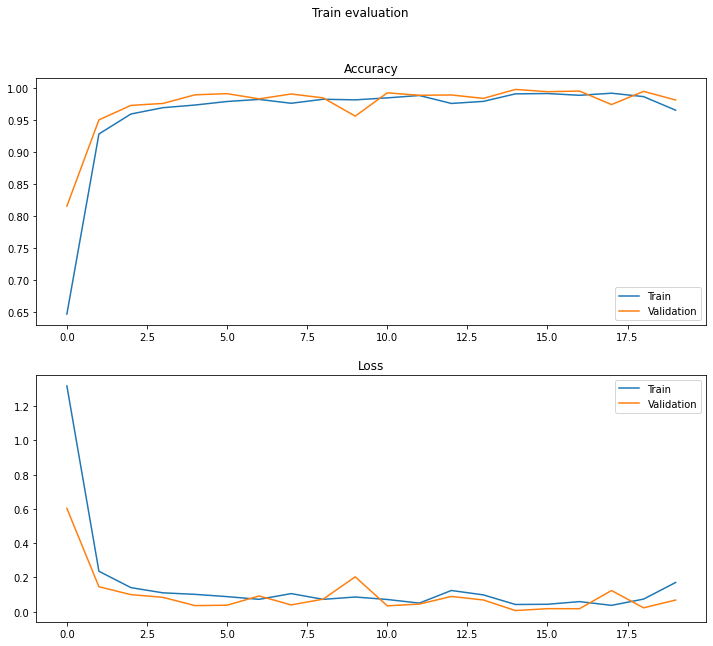

In [12]:


fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')



Prediction and Validation

In [13]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

123/123 [==============================] - 7s 55ms/step
-Acuracy achieved: 97.81%
-Accuracy by model was: 96.57%
-Accuracy by validation was: 98.16%
